### Speed of OT computation as a function of data size

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ot
from skimage.transform import downscale_local_mean

import readers
from utils import pixel_dist_3d

In [3]:
data_path = '/home/mn2822/Desktop/WormOT/data/zimmer/mCherry_v00065-01581.hdf5'

with readers.ZimmerReader(data_path) as reader:
    frame_1 = reader.get_frame(500)
    frame_2 = reader.get_frame(501)

frame shape: (890, 650, 33)
num. pixels: 19090500


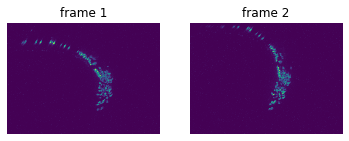

In [4]:
frame_shape = frame_1.shape
n_pixels = frame_shape[0] * frame_shape[1] * frame_shape[2]
print(f'frame shape: {frame_shape}')
print(f'num. pixels: {n_pixels}')

plt.subplot(121)
plt.imshow(np.max(frame_1, 2).T);
plt.title('frame 1')
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(frame_2, 2).T);
plt.title('frame 2')
plt.axis('off');

In [5]:
scl = (8, 8, 8)
ds_1 = downscale_local_mean(frame_1, scl)
ds_2 = downscale_local_mean(frame_2, scl)

/home/mn2822/anaconda3/envs/worm-ot/lib/python3.7/site-packages/skimage/util/shape.py:93: RuntimeWarning: Cannot provide views on a non-contiguous input array without copying.
  warn(RuntimeWarning("Cannot provide views on a non-contiguous input "


frame shape (downsampled): (112, 82, 5)
num. pixels (downsampled): 45920


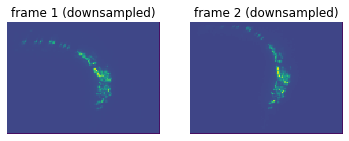

In [6]:
ds_shape = ds_1.shape
n_pixels_ds = ds_shape[0] * ds_shape[1] * ds_shape[2]
print(f'frame shape (downsampled): {ds_shape}')
print(f'num. pixels (downsampled): {n_pixels_ds}')

plt.subplot(121)
plt.imshow(np.max(ds_1, 2).T);
plt.title('frame 1 (downsampled)')
plt.axis('off')

plt.subplot(122)
plt.imshow(np.max(ds_2, 2).T);
plt.title('frame 2 (downsampled)')
plt.axis('off');

In [7]:
# Normalized pixel distance matrix 
M_nn = pixel_dist_3d(*ds_shape)
M = M_nn / np.median(M_nn)

# Entropic regularization parameter
reg = 1e-3

# Vectorized images
vec_1 = ds_1.flatten()
vec_2 = ds_2.flatten()

In [8]:
%%time
p_mtx = ot.sinkhorn(vec_1, vec_2, M, reg, verbose=True)

It.  |Err         
-------------------
    0|1.993046e-02|
   10|2.760909e-03|
   20|1.681074e-03|
   30|1.233838e-03|
   40|9.805614e-04|
   50|8.156352e-04|
   60|7.000849e-04|
   70|6.151086e-04|
   80|5.500427e-04|
   90|4.983385e-04|
  100|4.558444e-04|
  110|4.198966e-04|
  120|3.887730e-04|
  130|3.613479e-04|
  140|3.368730e-04|
  150|3.148386e-04|
  160|2.948863e-04|
  170|2.767546e-04|
  180|2.602448e-04|
  190|2.451995e-04|
It.  |Err         
-------------------
  200|2.314893e-04|
  210|2.190041e-04|
  220|2.076478e-04|
  230|1.973341e-04|
  240|1.879844e-04|
  250|1.795263e-04|
  260|1.718920e-04|
  270|1.650179e-04|
  280|1.588438e-04|
  290|1.533125e-04|
  300|1.483701e-04|
  310|1.439653e-04|
  320|1.400495e-04|
  330|1.365772e-04|
  340|1.335053e-04|
  350|1.307939e-04|
  360|1.284057e-04|
  370|1.263064e-04|
  380|1.244644e-04|
  390|1.228508e-04|
It.  |Err         
-------------------
  400|1.214394e-04|
  410|1.202065e-04|
  420|1.191308e-04|
  430|1.181931e-04|
  4